In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [156]:
warnings.filterwarnings('ignore')

In [3]:
sns.set(
    rc={'figure.figsize':(20,7)}
        )

Перед вами данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. 

И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).



In [4]:
os.listdir('../jupyter-a-hudjakov-21/shared/homeworks/python_ds_miniprojects/6')

['ads_data.csv', 'ads_clients_data.csv']

In [5]:
ads_data = pd.read_csv("../jupyter-a-hudjakov-21/shared/homeworks/python_ds_miniprojects/6/ads_data.csv", parse_dates=['date', 'time'])

In [6]:
ads_clients_data = pd.read_csv("../jupyter-a-hudjakov-21/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv", parse_dates=['date'])

In [7]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [8]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


# Задание 1

1. Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

In [9]:
df_event_count = ads_data \
    .groupby(['ad_id', 'event']) \
    .agg({'event':'count'}) \
    .rename(columns={'event':'event_count'}) \
    .reset_index()

In [10]:
df_event_count

,ad_id,event,event_count
0,2,click,1
1,2,view,101
2,3,click,3
3,3,view,184
4,1902,click,1
...,...,...,...
1476,122013,view,156
1477,122023,view,68
1478,122031,click,1
1479,122031,view,138


In [11]:
pivot_event_count = df_event_count.pivot(index='ad_id', columns='event', values='event_count')

In [12]:
round(pivot_event_count.fillna(0).click.mean())

113

In [13]:
round(pivot_event_count.fillna(0).view.mean())

923

# Задача 2

Давайте посмотрим на распределение показов объявлений!

По оси x – число показов

По оси y – доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. 


In [14]:
pivot_event_count = pivot_event_count.reset_index()

In [15]:
log_event_count = np.log(pivot_event_count.view)

In [16]:
log_event_count

0      4.615121
1      5.214936
2      3.713572
3      3.555348
4      4.060443
         ...   
960    4.605170
961    5.049856
962    4.219508
963    4.927254
964    3.737670
Name: view, Length: 965, dtype: float64

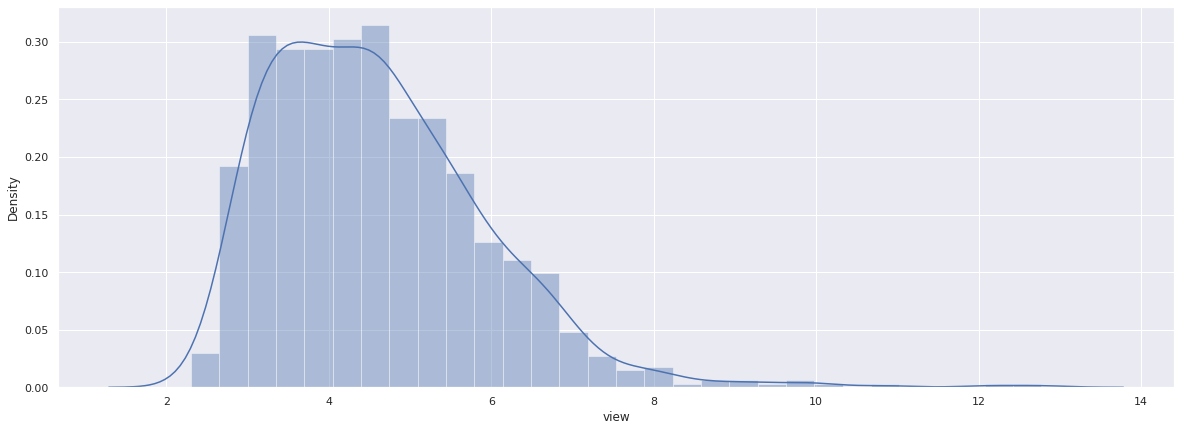

In [17]:
sns.distplot(log_event_count)

# Задание 3

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). 

После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

In [18]:
view_per_date_rolling = ads_data \
    .query("event == 'view'") \
    .groupby(['ad_id', 'date']) \
    .agg({'event' : 'count'}) \
    .rename(columns = {'event':'count_view'}) \
    .reset_index() \
    .groupby(['date']) \
    .agg({'count_view':'mean'}) \
    .count_view.rolling(2).mean()

In [19]:
view_per_date_mean = ads_data \
    .query("event == 'view'") \
    .groupby(['ad_id', 'date']) \
    .agg({'event' : 'count'}) \
    .rename(columns = {'event':'count_view'}) \
    .reset_index() \
    .groupby(['date']) \
    .agg({'count_view':'mean'}) 
    

In [20]:
view_per_date_rolling

date
2019-04-01           NaN
2019-04-02    146.134626
2019-04-03    150.869880
2019-04-04    419.927249
2019-04-05    797.505699
2019-04-06    598.116202
Name: count_view, dtype: float64

# Задание 4

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

In [21]:
view_per_date_mean.count_view

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
Name: count_view, dtype: float64

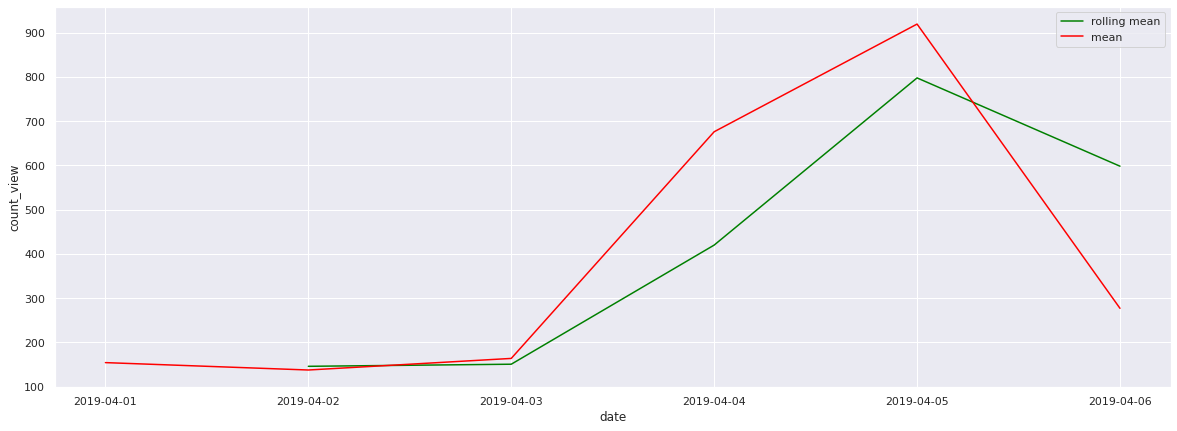

In [22]:
sns.lineplot(data=view_per_date_rolling, label='rolling mean', color='green')
sns.lineplot(data=view_per_date_mean.count_view, label='mean', color='red')

# Задание 6

Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней.

In [61]:
ads_clients_data

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08
...,...,...,...,...
122073,2020-05-07,122074,-130470790,2018-12-21
122074,2020-05-07,122075,-130911261,2018-11-09
122075,2020-05-07,122076,-130494912,2018-10-27
122076,2020-05-07,122077,-130910585,2018-12-05


In [89]:
df = ads_data.merge(ads_clients_data.drop(['date','community_id'],axis=1), on='client_union_id')

In [90]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2019-03-04
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2019-03-04


In [94]:
df.dtypes

date                     datetime64[ns]
time                     datetime64[ns]
event                            object
platform                         object
ad_id                             int64
client_union_id                   int64
campaign_union_id                 int64
ad_cost_type                     object
ad_cost                         float64
has_video                         int64
target_audience_count             int64
create_date              datetime64[ns]
dtype: object

In [91]:
df['create_date'] = pd.to_datetime(df['create_date'])

In [102]:
min_diff_date = df \
    .groupby('client_union_id') \
    .apply(lambda group : (group.date - group.create_date).min()) 
    

In [103]:
min_diff_date.max()

Timedelta('251 days 00:00:00')

# Задание 7

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

5/1000 * 100 = 5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с 

pd.Timedelta(365, unit='day'))

In [54]:
(df['diff_date'] < pd.Timedelta(365, unit='day')).sum()

1000000

In [106]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date,diff_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days


In [104]:
compare_year = pd.Timedelta(365, unit='day')

In [105]:
df['diff_date'] = df.date - df.create_date

In [110]:
min_diff_date_2 = df \
    .groupby('client_union_id', as_index=False) \
    .agg({'diff_date':'min'}) 

In [111]:
min_diff_date_2

,client_union_id,diff_date
0,1,98 days
1,9,114 days
2,13,66 days
3,16,105 days
4,20,32 days
...,...,...
833,122004,67 days
834,122013,151 days
835,122023,126 days
836,122031,96 days


In [116]:
act_client = min_diff_date_2.query("diff_date < @compare_year").shape[0]

In [117]:
pass_client =ads_clients_data.client_union_id.nunique()

In [121]:
round(+(act_client / pass_client) * 100, 2)

0.69

# Задание 8

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). 

Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. 

Создать временные промежутки можно с помощью pd.to_timedelta().


In [152]:
df['diff_date_categorical'] = pd.cut(df.diff_date,
       bins = pd.to_timedelta(['0d','30d', '90d','180d', '365d']),
       right=True,
       labels=['0-30 days','30-90 days','90-180 days','180-365']) 

In [151]:
uniq_client_cat = pd.cut(df.diff_date,
       bins = pd.to_timedelta(['0d','30d', '90d','180d', '365d']),
       right=True,
       labels=['0-30 days','30-90 days','90-180 days','180-365']) \
    .value_counts()

In [154]:
pd.cut(df.diff_date,
       bins = pd.to_timedelta(['0d','30d', '90d','180d', '365d']),
       right=True,
       labels=['0-30 days','30-90 days','90-180 days','180-365']) \
    .value_counts()

30-90 days     581476
90-180 days    363404
180-365         53431
0-30 days        1689
Name: diff_date, dtype: int64

In [146]:
df.diff_date_categorical.value_counts()

2    581476
3    363404
4     53431
1      1689
Name: diff_date_categorical, dtype: int64

In [150]:
df

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,create_date,diff_date,diff_date_categorical
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days,90-180
1,2019-04-01,2019-04-01 00:03:28,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days,90-180
2,2019-04-01,2019-04-01 00:04:58,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days,90-180
3,2019-04-01,2019-04-01 00:10:23,view,ios,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days,90-180
4,2019-04-01,2019-04-01 00:15:42,view,android,45061,34734,45061,CPM,200.6,0,1955269,2018-12-04,118 days,90-180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2019-04-04,2019-04-04 18:07:25,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days,30-90
999996,2019-04-04,2019-04-04 18:29:06,view,ios,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days,30-90
999997,2019-04-04,2019-04-04 18:55:46,view,web,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days,30-90
999998,2019-04-04,2019-04-04 19:21:09,view,android,43921,30712,43920,CPM,196.7,0,7807,2019-03-04,31 days,30-90


In [140]:
df.query("diff_date_categorical == '1'").client_union_id.nunique()

11

In [159]:
client_cat = pd.cut(min_diff_date_2.diff_date,
       bins = pd.to_timedelta(['0d','30d', '90d','180d', '365d']),
       right=True,
       labels=['0-30 days','30-90 days','90-180 days','180-365']) \
    .value_counts()

In [160]:
client_cat

90-180 days    396
30-90 days     263
180-365        168
0-30 days       11
Name: diff_date, dtype: int64

# Задание 9

И последнее задание:

постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). 

Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

In [144]:
uniq_client_cat

2    581476
3    363404
4     53431
1      1689
Name: diff_date, dtype: int64

In [162]:
px.bar(client_cat)